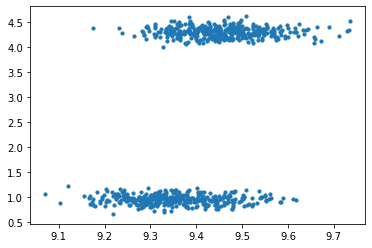

In [ ]:
###
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 700, n_features=2, centers=2, cluster_std=0.1, shuffle=True, random_state=4)
plt.scatter(X[:,0], X[:,1], s=10, marker='o')
km = KMeans(n_clusters = 3, init='random', n_init=5, max_iter=300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)

# Description about
n_clusters = 3, the number of centroids
n_init the number of times that run the algorithm
remember with different random centroids with the objective of
minimize SSE.
# max iter---the number of maximun iterations
in each only ejecution..




## A problem in K-means is one centroid could be let empty...
this is soluted with C-fuzzy means..

this is stopped if reach the convergence before of reach the number
of maximun iterations..


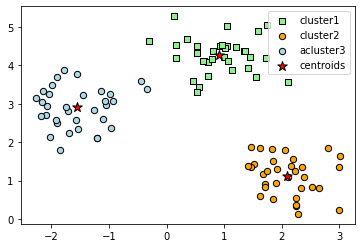

In [ ]:
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)


In [ ]:
# K-means ++
#How initialize the centroids...
## initialize with init='k-means++'

In [ ]:
# Elbow method...
# We can uses SSE to measure
# we can get SSE with km.inertia_

In [ ]:
km.inertia_

48.23520512521979

In [ ]:
## How we can choose k.
# if K increase the distortion reduced
# due centroids are nearest of points..
# the insight behind elbow method  is that choose the value of K where distortion increase more fast

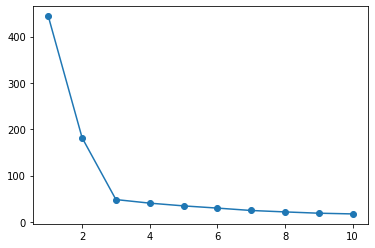

In [ ]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')

In [ ]:
## Calidad del agrupamiento....
# una representación gŕafica de como están agrupadas las muestras en los grupos...

# Cohesión del grupo a(i)  la distancia media entre una muestra y el restante de muestras en el mismo grupo
# separación del grupo b(i) a partil del grupo  mas cercano como la distancia entre una muestra
# y todas las muestras del grupo mas cercano.


In [ ]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
y_km = km.fit_predict(X)

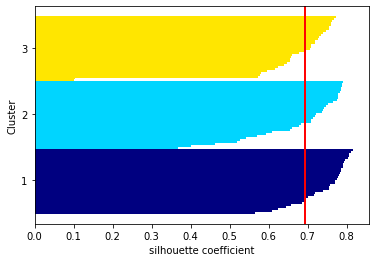

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height=1.0, edgecolor='none', color = color)
  yticks.append((y_ax_lower + y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
  plt.axvline(silhouette_avg, color='red')
  plt.yticks(yticks, cluster_labels+1)
  plt.ylabel('Cluster')
  plt.xlabel('silhouette coefficient')

In [ ]:
# Hierarchical clustering
# Advantage no is neccesary define k apriori ....

#Example using complete linkage...
##### remeber algorithm --->
# Calculate the distance matrix..
# combine the two groups more closest in more inequality distances
# update matrix
# repeat until there are one cluster

In [ ]:
import pandas as pd
import numpy as np
vars = ['income', 'consumption', 'visits']
labels = ['one', 'two', 'three', 'four', 'five']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=vars)

In [ ]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)

In [ ]:
row_dist

,one,two,three,four,five
one,0.000000,8.306044,6.484029,8.453478,11.411176
two,8.306044,0.000000,5.063397,2.260569,9.135266
three,6.484029,5.063397,0.000000,6.725847,8.941085
four,8.453478,2.260569,6.725847,0.000000,10.847696
five,11.411176,9.135266,8.941085,10.847696,0.000000


In [ ]:
from  scipy.cluster.hierarchy import linkage

In [ ]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [ ]:
pd.DataFrame(row_clusters, columns=['label1', 'label2', 'distance', 'number of items']
             , index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])


,label1,label2,distance,number of items
cluster 1,1.0,3.0,2.260569,2.0
cluster 2,0.0,2.0,6.484029,2.0
cluster 3,5.0,6.0,8.453478,4.0
cluster 4,4.0,7.0,11.411176,5.0


Text(0, 0.5, 'l2 norma')

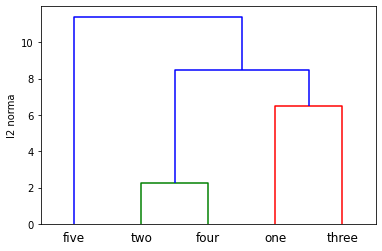

In [ ]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels =labels)
plt.ylabel('l2 norma')